# Part II - Prosper Loan - Finance cost drivers
## by Neo Nakedi

## Investigation Overview


During the investigation, we attempted to understand what the biggest driver of finance cost (Borrower's APR). This was done through the analysis of univariate, bivariate and mulitvariate analysis.



## Dataset Overview

Provide a brief overview of the dataset to be presented here.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Data/prosperLoanData.csv') #Load data

## 1. ProsperRating and BorrowerAPR (finance cost)

The PropserRating, with 1 being the lowest and 7 being the highest credit risk score is a great indicator of credit risk. It is expected that risk and return have a direct positively correlated relationship. The risk of the borrower is expressed in terms of the ProsperRating and the return/cost is represented by the BorrowerARP, also known as the finance cost. The higher the borrower's risk the higher the finance cost.

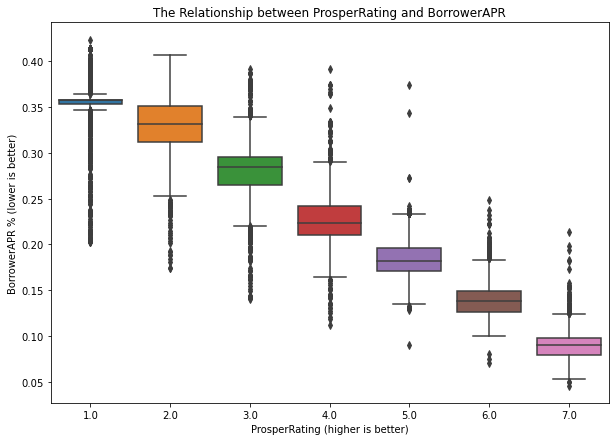

In [4]:
# Scatterplot Borrower APR vs ProsperRating
plt.figure(figsize=[10, 7])
sns.boxplot(x=df['ProsperRating (numeric)'],y=df['BorrowerAPR']);
plt.title('The Relationship between ProsperRating and BorrowerAPR')
plt.xlabel('ProsperRating (higher is better)')
plt.ylabel('BorrowerAPR % (lower is better)')
plt.show();

## 2. ProsperRating, BorrowerAPR & Term

- Following on from the relationship between credit risk ratings and finance cost, we bring in the third variable, term of the loan.
- This now allows us to compare the different loan terms of 12, 36 & 60 on the same linear scale.
- it was interesting to see that a long-term of 60 months attracts the lowest average BorrowerAPR until the mean ProsperRating of 4. After the mean ProsperRating of 4, 60-months attracts the highest average BorrowerAPR, followed by 36 months, then finally 12 months. The term of the loan appears to have an impact on BorrowerAPR after from the Mean ProsperRating of 4. However, across the board, the term of 60 months have the largest interquartile ranges as compared to the other two terms.
- My expectation was that 60 months would always carry the highest finance cost (BorrowersAPR) at every ProsperRating point

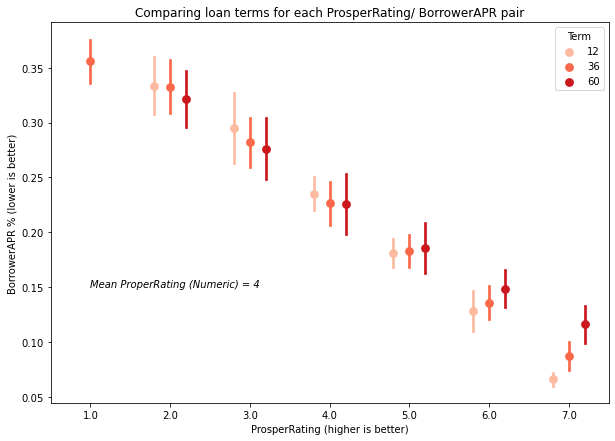

In [5]:
#plot pointplot
fig = plt.figure(figsize = [10,7])
ax = sns.pointplot(data = df, x = 'ProsperRating (numeric)', y = 'BorrowerAPR', hue = 'Term',
                  palette = 'Reds', linestyles = '',dodge = 0.4, ci='sd')
plt.text(0, 0.15,f"Mean ProperRating (Numeric) = {df['ProsperRating (numeric)'].mean():.0f}", style='italic');
plt.title('Comparing loan terms for each ProsperRating/ BorrowerAPR pair')
plt.xlabel('ProsperRating (higher is better)')
plt.ylabel('BorrowerAPR % (lower is better)');

## 3. Borrowers APR (Cost) vs Lenders Yield (return)
BorrowerAPR appear to average slightly above 0.2% regardless of the term, meaning that the term of the loan has little influence on the BorrowerAPR. However, the term of the loan has a higher impact on the term. Yields for the lenders are higher at 36 months, making it the sweetest spot for the lenders, which could explain why a significant portion of the loans have a term of 36 months. Lenders/investors are more likely to fund loans with the highest return for them. 12-month loans are 1% of the population, and this could be caused by the fact that these loans have the lowest yield for the lender.


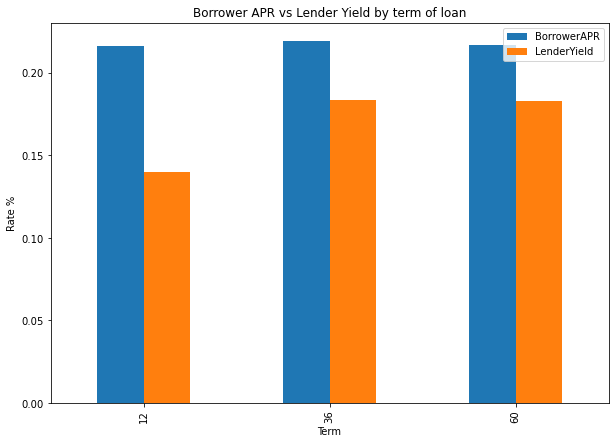

In [6]:
#Create pivot table to calculate averages of BorrowerAPR & Lenders Yield
df_pivot = df.pivot_table(index=None, columns='Term', values=['BorrowerAPR', 'LenderYield'],
                                               aggfunc=np.mean)
df_pivot.T.plot(kind='bar', figsize=(10,7), ylabel='Rate %', title='Borrower APR vs Lender Yield by term of loan');

# Conclusion
1. It is clear that the BorrowerAPR and ProsperRatings have the highest correlation. The higher the ProsperRating the lower the Borrower APR.
2. The term of the loan has an impact on BorrowerAPR only if the proser rating is above the mean
3. The lender's Yield of the loan is impacted by the term of the loan. The highest yield is at 36 months, which explains why over 77% of the loans have a term of 36 months